In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("food-allergy-analysis-Zenodo.csv")

# Display initial info
print("Initial Dataset Overview:")
df.info()
df.head()


Initial Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333200 entries, 0 to 333199
Data columns (total 50 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   SUBJECT_ID               333200 non-null  int64  
 1   BIRTH_YEAR               333200 non-null  int64  
 2   GENDER_FACTOR            333200 non-null  object 
 3   RACE_FACTOR              333200 non-null  object 
 4   ETHNICITY_FACTOR         333200 non-null  object 
 5   PAYER_FACTOR             333200 non-null  object 
 6   ATOPIC_MARCH_COHORT      333200 non-null  bool   
 7   AGE_START_YEARS          333200 non-null  float64
 8   AGE_END_YEARS            333200 non-null  float64
 9   SHELLFISH_ALG_START      5246 non-null    float64
 10  SHELLFISH_ALG_END        1051 non-null    float64
 11  FISH_ALG_START           1796 non-null    float64
 12  FISH_ALG_END             527 non-null     float64
 13  MILK_ALG_START           7289 non

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,...,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
0,1,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P1 - Medicaid,False,0.093087,3.164956,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1994,S1 - Female,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,12.232717,18.880219,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.262834,18.880219,2.0
2,3,2006,S0 - Male,R0 - White,E1 - Hispanic,P0 - Non-Medicaid,True,0.010951,6.726899,NaN,...,NaN,4.884326,NaN,3.917864,6.157426,5.127995,NaN,1.404517,6.157426,4.0
3,4,2004,S0 - Male,R4 - Unknown,E1 - Hispanic,P0 - Non-Medicaid,False,2.398357,9.111567,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.013689,6.193018,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# Extract meaningful labels from categorical columns
for col in ["GENDER_FACTOR", "RACE_FACTOR", "ETHNICITY_FACTOR", "PAYER_FACTOR"]:
    df[col] = df[col].str[5:]

# Remove negative values in ATOPIC_DERM_START
df = df[df["ATOPIC_DERM_START"] >= 0]

# Display cleaned dataset info
print("\nCleaned Dataset Overview:")
df.info()
df.head()




Cleaned Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 49505 entries, 2 to 333199
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SUBJECT_ID               49505 non-null  int64  
 1   BIRTH_YEAR               49505 non-null  int64  
 2   GENDER_FACTOR            49505 non-null  object 
 3   RACE_FACTOR              49505 non-null  object 
 4   ETHNICITY_FACTOR         49505 non-null  object 
 5   PAYER_FACTOR             49505 non-null  object 
 6   ATOPIC_MARCH_COHORT      49505 non-null  bool   
 7   AGE_START_YEARS          49505 non-null  float64
 8   AGE_END_YEARS            49505 non-null  float64
 9   SHELLFISH_ALG_START      1825 non-null   float64
 10  SHELLFISH_ALG_END        381 non-null    float64
 11  FISH_ALG_START           803 non-null    float64
 12  FISH_ALG_END             238 non-null    float64
 13  MILK_ALG_START           2461 non-null   float64
 14 

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,...,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
2,3,2006,,,,id,True,0.010951,6.726899,NaN,...,NaN,4.884326,NaN,3.917864,6.157426,5.127995,NaN,1.404517,6.157426,4.0
8,9,2006,,,ic,id,True,0.019165,6.726899,NaN,...,NaN,1.015743,1.015743,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,17,2006,,,ic,id,True,0.010951,6.217659,NaN,...,NaN,0.399726,0.399726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,20,2006,,,ic,id,False,0.013689,2.841889,NaN,...,NaN,2.151951,2.151951,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,31,2006,,,ic,,True,0.021903,5.681040,NaN,...,NaN,0.654346,3.707050,NaN,NaN,NaN,NaN,NaN,NaN,NaN


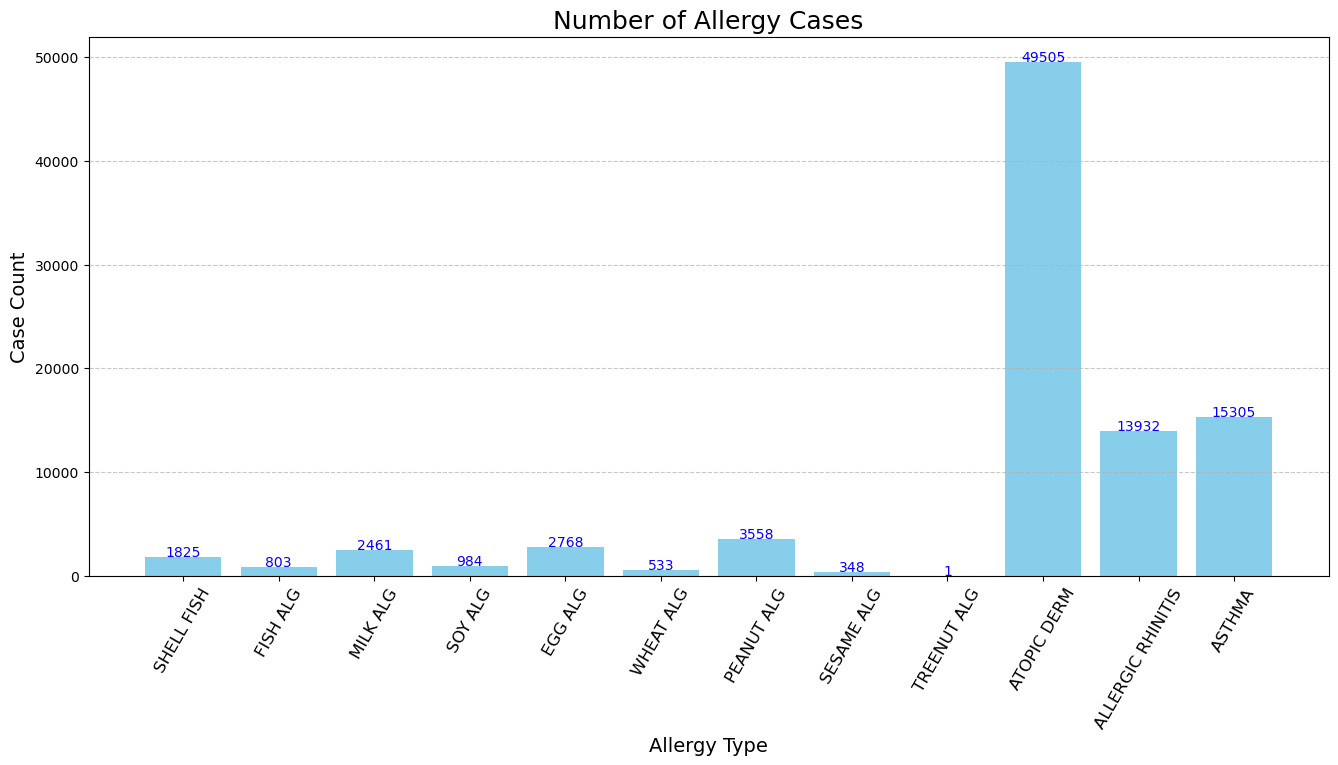

In [13]:
# Define allergy mappings
allergy_mapping = {
    'SHELL FISH': 'SHELLFISH_ALG_START',
    'FISH ALG': 'FISH_ALG_START',
    'MILK ALG': 'MILK_ALG_START',
    'SOY ALG': 'SOY_ALG_START',
    'EGG ALG': 'EGG_ALG_START',
    'WHEAT ALG': 'WHEAT_ALG_START',
    'PEANUT ALG': 'PEANUT_ALG_START',
    'SESAME ALG': 'SESAME_ALG_START',
    'TREENUT ALG': 'TREENUT_ALG_START',
    'ATOPIC DERM': 'ATOPIC_DERM_START',
    'ALLERGIC RHINITIS': 'ALLERGIC_RHINITIS_START',
    'ASTHMA': 'ASTHMA_START'
}

# Get counts for each allergy
allergy_counts = {key: df[value].count() for key, value in allergy_mapping.items()}
#print(allergy_counts)

# Bar Plot
plt.figure(figsize=(16, 7))
plt.bar(allergy_counts.keys(), allergy_counts.values(), color='skyblue')
plt.xticks(rotation=60, fontsize=12)
plt.title('Number of Allergy Cases', fontsize=18)
plt.xlabel('Allergy Type', fontsize=14)
plt.ylabel('Case Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Label each bar
for i, (label, count) in enumerate(allergy_counts.items()):
    plt.text(i, count + 50, str(count), ha='center', fontsize=10, color='blue')

plt.show()

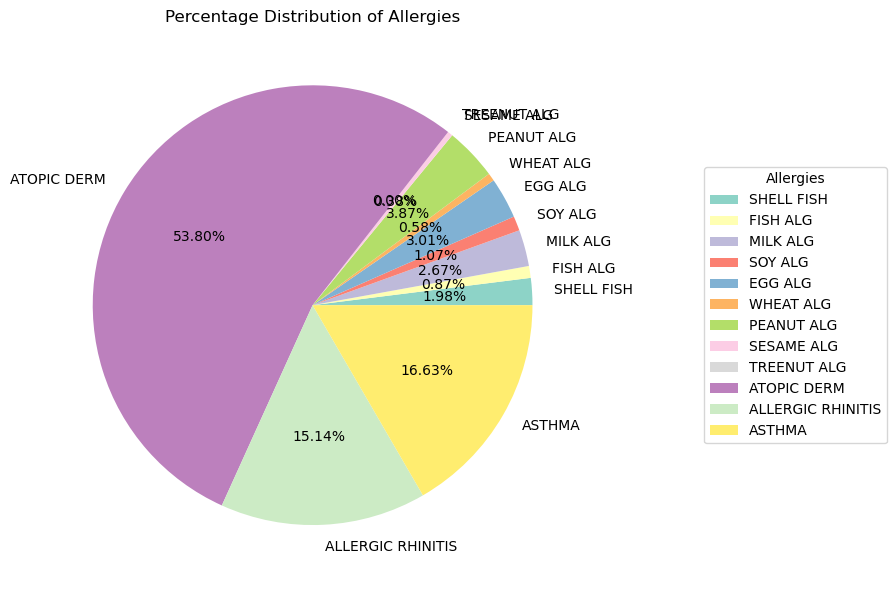

In [7]:
plt.figure(figsize=(12, 6))  # Made figure wider to accommodate legend
plt.pie(allergy_counts.values(), 
        labels=allergy_counts.keys(), 
        autopct='%.2f%%', 
        colors=sns.color_palette("Set3"))  # Changed to Set3 color palette
plt.title("Percentage Distribution of Allergies")
plt.legend(allergy_counts.keys(), 
          title="Allergies",
          loc="center left",
          bbox_to_anchor=(1.2, 0.5))  # Moved legend further right
plt.tight_layout()  # Adjust layout to prevent legend cutoff
plt.show()

C:\Users\gks99\AppData\Local\Temp\ipykernel_22440\2847880622.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['GENDER_FACTOR'], ax=axes[0], palette=gender_colors)


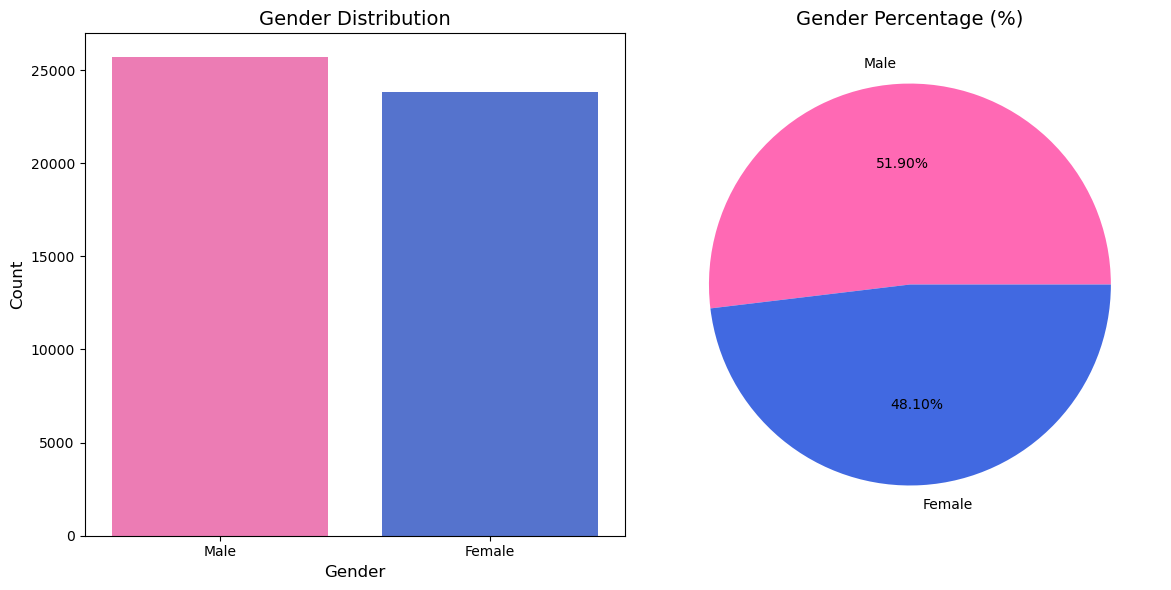

In [36]:
# Define consistent colors for both plots
gender_colors = ["#FF69B4", "#4169E1"]  # Pink and Royal Blue

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot
sns.countplot(x=df['GENDER_FACTOR'], ax=axes[0], palette=gender_colors)
axes[0].set_title('Gender Distribution', fontsize=14)
axes[0].set_xlabel('Gender', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Pie Chart
gender_counts = df["GENDER_FACTOR"].value_counts()
axes[1].pie(gender_counts, labels=gender_counts.index, autopct='%.2f%%', colors=gender_colors)
axes[1].set_title('Gender Percentage (%)', fontsize=14)

plt.tight_layout()
plt.show()

C:\Users\gks99\AppData\Local\Temp\ipykernel_22440\2835939002.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=race_counts.index, y=race_counts.values, ax=axes[0], palette=race_palette)


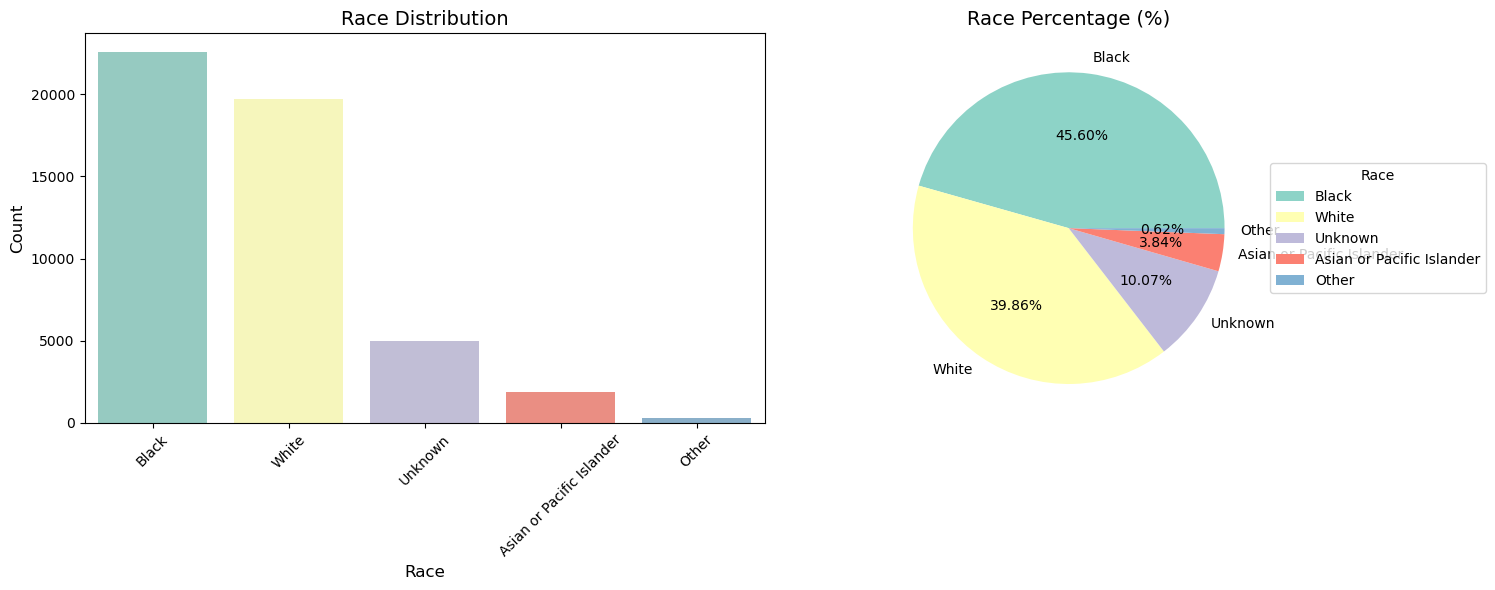

In [22]:
# Set figure size for Race Distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Create color palette
race_palette = sns.color_palette("Set3", len(df['RACE_FACTOR'].unique()))

# Race Distribution Bar Chart
race_counts = df["RACE_FACTOR"].value_counts()
sns.barplot(x=race_counts.index, y=race_counts.values, ax=axes[0], palette=race_palette)
axes[0].set_title('Race Distribution', fontsize=14)
axes[0].set_xlabel('Race', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Race Percentage Pie Chart
axes[1].pie(race_counts, labels=race_counts.index, autopct='%.2f%%', colors=race_palette)
axes[1].set_title('Race Percentage (%)', fontsize=14)
axes[1].legend(race_counts.index, title="Race", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust layout
plt.tight_layout()
plt.show()


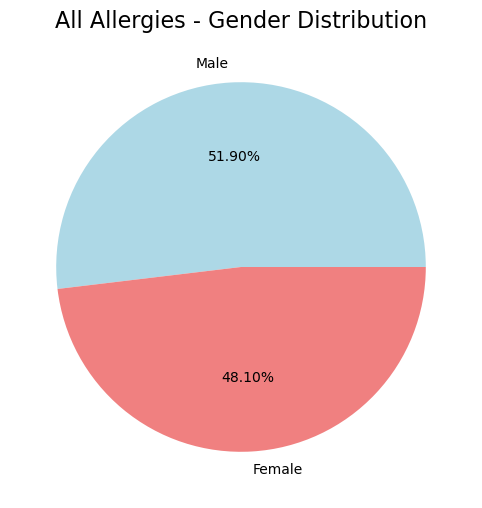

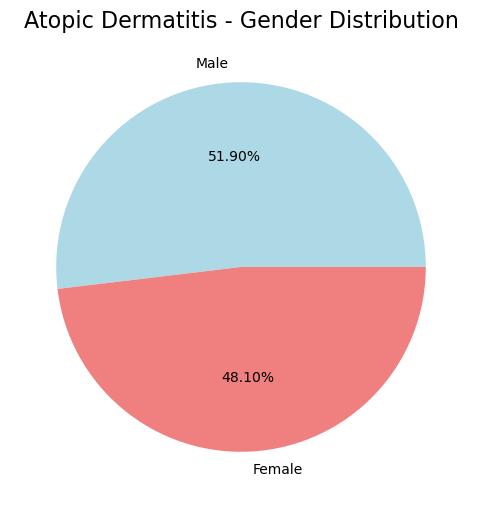

In [34]:
# Gender Comparison for All Allergies
plt.figure(figsize=(8, 6))
plt.pie(df["GENDER_FACTOR"].value_counts(), labels=df["GENDER_FACTOR"].unique(), autopct='%.02f%%', colors=['lightblue', 'lightcoral'])
plt.title("All Allergies - Gender Distribution", fontsize=16)
plt.show()

# Gender Comparison for Atopic Dermatitis
plt.figure(figsize=(8, 6))
plt.pie(df_ad["GENDER_FACTOR"].value_counts(), labels=df_ad["GENDER_FACTOR"].unique(), autopct='%.02f%%', colors=['lightblue', 'lightcoral'])
plt.title("Atopic Dermatitis - Gender Distribution", fontsize=16)
plt.show()


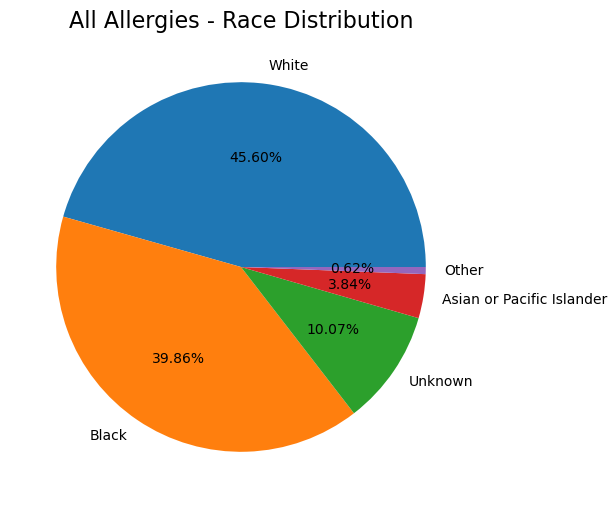

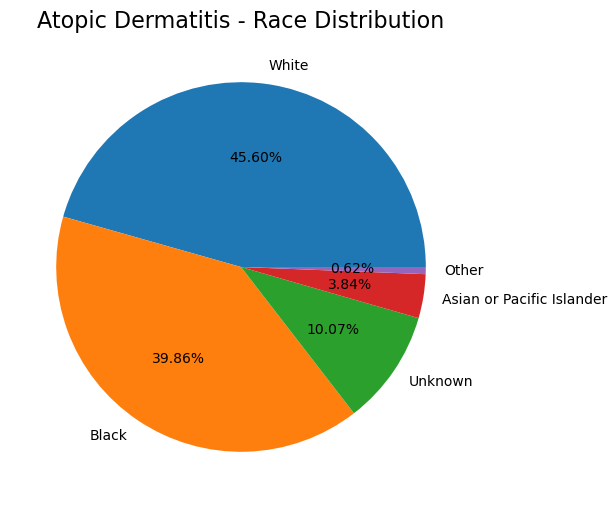

In [35]:
# Race Comparison for All Allergies
plt.figure(figsize=(8, 6))
plt.pie(df["RACE_FACTOR"].value_counts(), labels=df["RACE_FACTOR"].unique(), autopct='%.02f%%')
plt.title("All Allergies - Race Distribution", fontsize=16)
plt.show()

# Race Comparison for Atopic Dermatitis
plt.figure(figsize=(8, 6))
plt.pie(df_ad["RACE_FACTOR"].value_counts(), labels=df_ad["RACE_FACTOR"].unique(), autopct='%.02f%%')
plt.title("Atopic Dermatitis - Race Distribution", fontsize=16)
plt.show()


C:\Users\gks99\AppData\Local\Temp\ipykernel_22440\3051399373.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ethnicity_counts.index, y=ethnicity_counts.values, ax=axes[0], palette=ethnicity_palette)


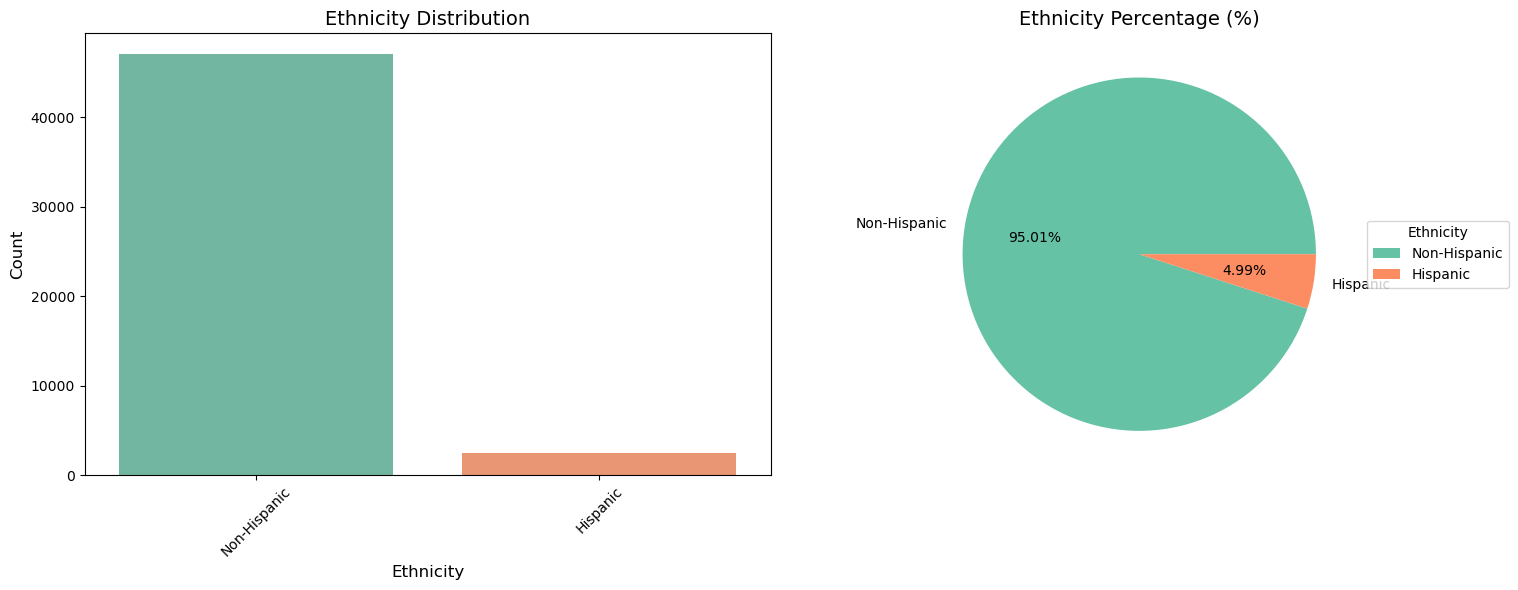

In [23]:
# Set figure size for Ethnicity Distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Create color palette
ethnicity_palette = sns.color_palette("Set2", len(df['ETHNICITY_FACTOR'].unique()))

# Ethnicity Distribution Bar Chart
ethnicity_counts = df["ETHNICITY_FACTOR"].value_counts()
sns.barplot(x=ethnicity_counts.index, y=ethnicity_counts.values, ax=axes[0], palette=ethnicity_palette)
axes[0].set_title('Ethnicity Distribution', fontsize=14)
axes[0].set_xlabel('Ethnicity', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Ethnicity Percentage Pie Chart
axes[1].pie(ethnicity_counts, labels=ethnicity_counts.index, autopct='%.2f%%', colors=ethnicity_palette)
axes[1].set_title('Ethnicity Percentage (%)', fontsize=14)
axes[1].legend(ethnicity_counts.index, title="Ethnicity", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust layout
plt.tight_layout()
plt.show()


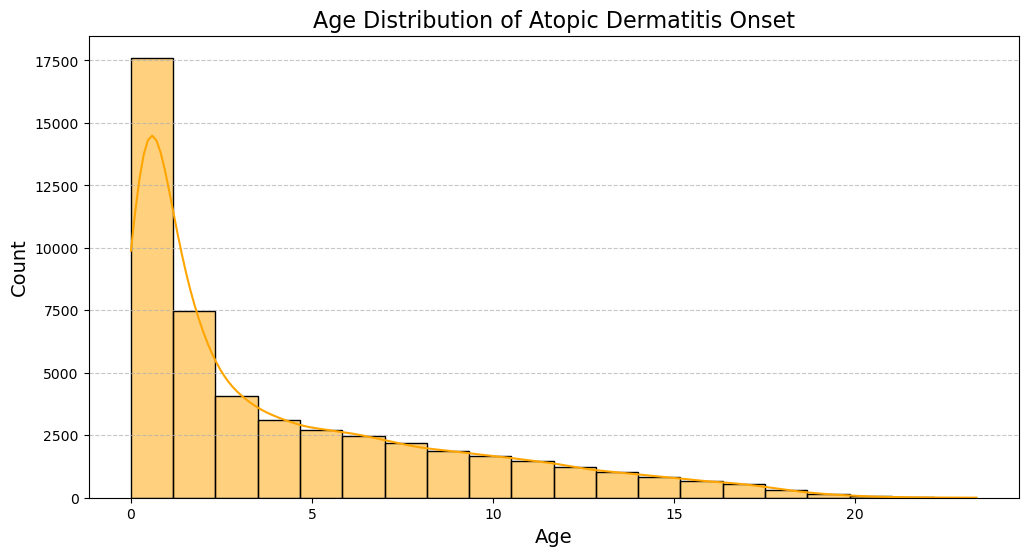

In [10]:
plt.figure(figsize=(12, 6))
sns.histplot(df["ATOPIC_DERM_START"], bins=20, kde=True, color="orange")
plt.title("Age Distribution of Atopic Dermatitis Onset", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


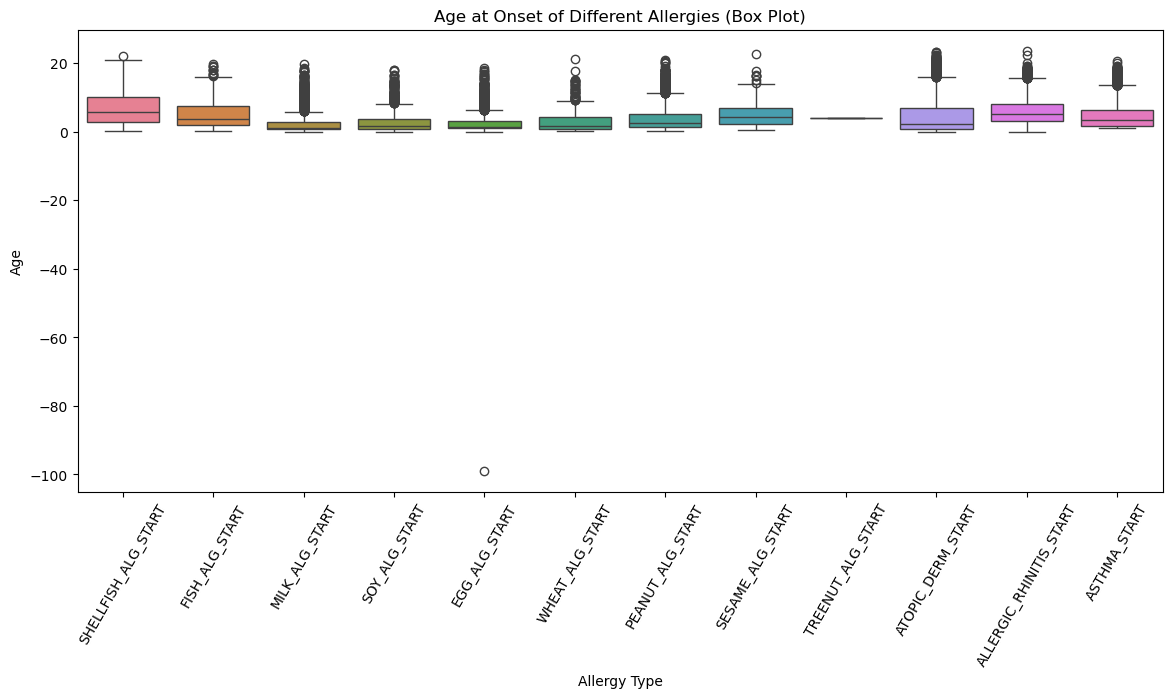

In [21]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[list(allergy_mapping.values())])
plt.xticks(rotation=60)
plt.title("Age at Onset of Different Allergies (Box Plot)")
plt.xlabel("Allergy Type")
plt.ylabel("Age")
plt.show()
